In [1]:
# Quick baseline model (30 minutes)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Load data
df = pd.read_csv('../data/processed/feature_matrix.csv')

# Features and target
feature_cols = ['elevation_mean', 'elevation_min', 'flow_log', 
                'flow_max', 'rainfall_mean', 'rainfall_max']
X = df[feature_cols]
y = df['flooded']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=20,
    class_weight='balanced',  # Handle imbalance
    random_state=42
)
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print(f"Accuracy: {(y_pred == y_test).mean():.3f}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]):.3f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.812
AUC-ROC: 0.888
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       256
           1       0.30      0.77      0.43        26

    accuracy                           0.81       282
   macro avg       0.64      0.79      0.66       282
weighted avg       0.91      0.81      0.85       282



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

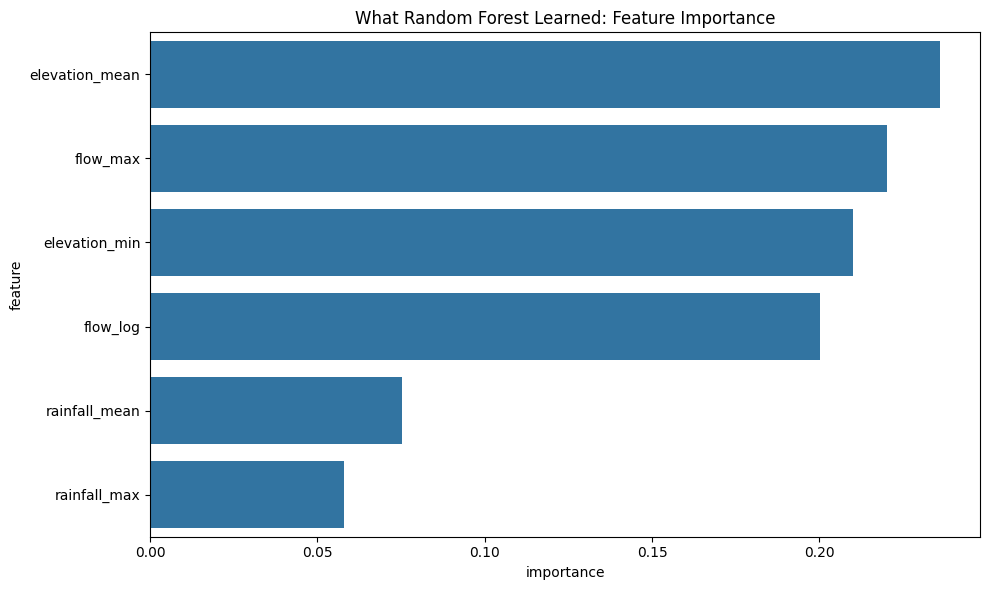

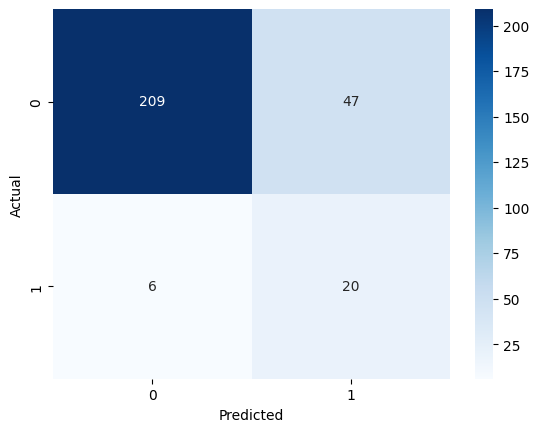

Wards with prediction errors:
ward_id
116    4
71     4
64     3
91     3
88     3
121    3
58     2
55     2
86     2
100    2
dtype: int64


In [3]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('What Random Forest Learned: Feature Importance')
plt.tight_layout()
plt.show()

# Confusion matrix heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Which wards is the model getting wrong?
test_df = df.iloc[X_test.index].copy()
test_df['predicted'] = y_pred
test_df['actual'] = y_test
errors = test_df[test_df['predicted'] != test_df['actual']]
print("Wards with prediction errors:")
print(errors.groupby('ward_id').size().sort_values(ascending=False).head(10))